# 啤酒数据

## 场景 Scenario

手上有一批啤酒数据，各个配料的成分不一样，尝试使用K-means聚类，聚成K=2或K=3类，并查看聚类之后结果在各个配料搭配的二维显示上是否明显，并使用轮廓系数评价结果

I have a batch of beer data where the ingredients vary. I will attempt to use K-means clustering with K=2 or K=3 clusters and check whether the clustering results are visually distinct when displayed in two dimensions based on the combinations of ingredients. Additionally, I will evaluate the results using the silhouette score.

In [20]:
import pandas as pd
beer = pd.read_csv('data.txt', sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


## 聚类 clustering

In [27]:
from sklearn.cluster import KMeans

X = beer[["calories","sodium","alcohol","cost"]]

# K=3
km3 = KMeans(n_clusters=3).fit(X)
print(km3.labels_)

# K=2
km2 = KMeans(n_clusters=2).fit(X)
print(km2.labels_)

[0 0 0 0 0 0 0 0 2 2 0 2 0 0 0 1 0 0 1 2]
[0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1]


In [28]:
# 查看聚类K=3和聚类K=2的质心
# View the centroids for K=3 and K=2 clusters
print(km3.cluster_centers_)
print(km2.cluster_centers_)

[[150.          17.           4.52142857   0.52071429]
 [ 70.          10.5          2.6          0.42      ]
 [102.75        10.           4.075        0.44      ]]
[[150.          17.           4.52142857   0.52071429]
 [ 91.83333333  10.16666667   3.58333333   0.43333333]]


In [29]:
# 设置标签
# Set labels
beer['cluster3'] = km3.labels_
beer['cluster2'] = km2.labels_
beer

,name,calories,sodium,alcohol,cost,cluster3,cluster2
0,Budweiser,144,15,4.7,0.43,0,0
1,Schlitz,151,19,4.9,0.43,0,0
2,Lowenbrau,157,15,0.9,0.48,0,0
3,Kronenbourg,170,7,5.2,0.73,0,0
4,Heineken,152,11,5.0,0.77,0,0
5,Old_Milwaukee,145,23,4.6,0.28,0,0
6,Augsberger,175,24,5.5,0.40,0,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,0
8,Miller_Lite,99,10,4.3,0.43,2,1
9,Budweiser_Light,113,8,3.7,0.40,2,1


Text(0.5, 0.98, 'With 3 centroids initialized')

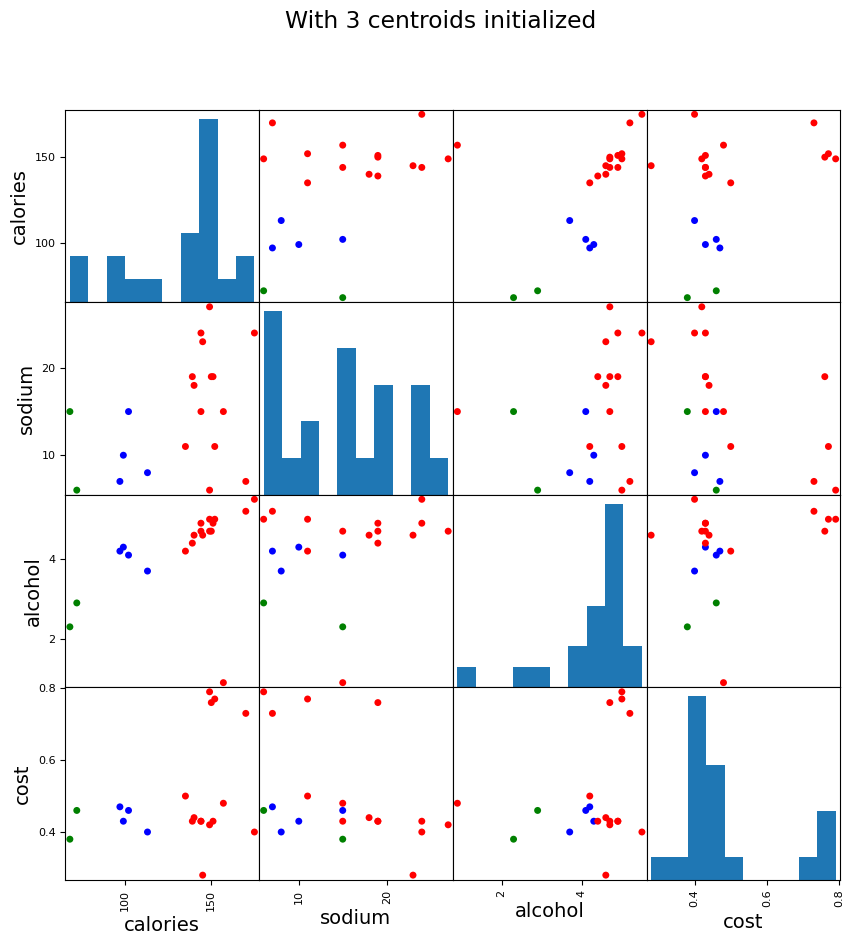

In [30]:
# 导入必要的库
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# 绘制各2维组合在K=3类时的聚类效果
# Plot the clustering effect for all 2D combinations when K=3
centers = beer[['calories', 'sodium', 'alcohol', 'cost', 'cluster3']].groupby("cluster3").mean().reset_index()
%matplotlib inline
plt.rcParams['font.size'] = 14
colors = np.array(['red', 'green', 'blue', 'yellow'])
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[beer["cluster3"]], figsize=(10,10))
plt.suptitle("With 3 centroids initialized")

Text(0.5, 0.98, 'With 2 centroids initialized')

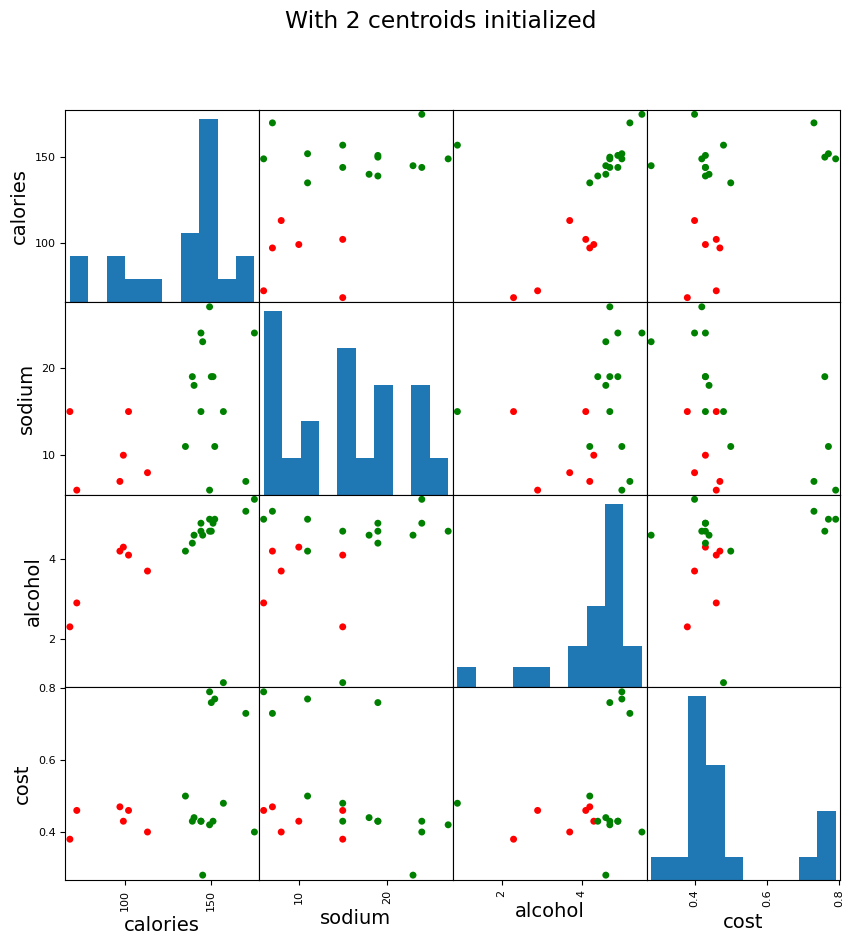

In [12]:
# 绘制各2维组合在K=2类时的聚类效果
# Plot the clustering effect for all 2D combinations when K=2
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[beer["cluster2"]], figsize=(10,10))
plt.suptitle("With 2 centroids initialized")

Scaled Cluster Silhouette Score: 0.6731775046455796
Original Cluster Silhouette Score: 0.6731775046455796


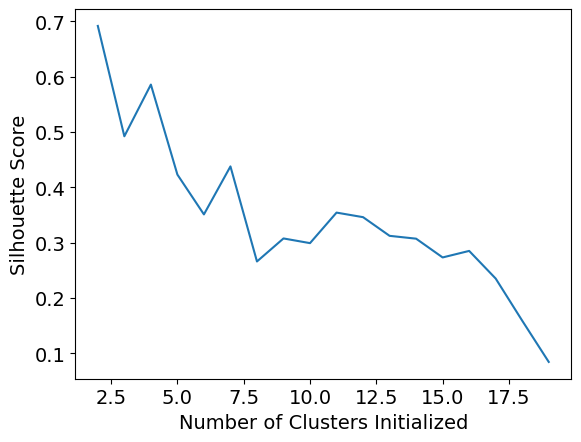

In [32]:
# 使用轮廓系数评价结果
# Evaluate the result using the silhouette coefficient

# 导入必要的库
# Import necessary libraries
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 计算基于原始聚类结果的轮廓分数
# Calculate the silhouette score based on the original clustering results
score = metrics.silhouette_score(X, beer['cluster3'])

# 打印轮廓分数
# Print the silhouette scores
print("Scaled Cluster Silhouette Score:", score_scaled)
print("Original Cluster Silhouette Score:", score)

# 初始化一个空的列表，用于存储不同簇数下的轮廓系数
# Initialize an empty list to store silhouette scores for different cluster numbers
scores = []

# 尝试不同的簇数 (从 2 到 19)，并计算轮廓系数
# Try different numbers of clusters (from 2 to 19) and calculate the silhouette coefficient
for k in range(2, 20):
    # 使用 KMeans 聚类
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit(X).labels_  # 获取聚类标签
    # Get cluster labels
    
    # 计算轮廓分数
    # Calculate the silhouette score
    score = metrics.silhouette_score(X, labels)
    
    # 将当前簇数的轮廓分数添加到列表中
    # Append the current cluster's silhouette score to the list
    scores.append(score)

# 绘制簇数与轮廓分数的关系曲线
# Plot the relationship between the number of clusters and the silhouette score
plt.plot(list(range(2, 20)), scores)
plt.xlabel("Number of Clusters Initialized")  # 设置 x 轴标签
plt.ylabel("Silhouette Score")  # 设置 y 轴标签

# 显示图形
# Show the plot
plt.show()